In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from file_readers.LocationFileReader import LocationFileReader
from file_readers.PropertyFileReader import PropertyFileReader
from file_readers.OffenseFileReader import OffenseFileReader
from file_readers.IncidentFileReader import IncidentFileReader

property_file_reader = PropertyFileReader()
offense_file_reader = OffenseFileReader()
incident_file_reader = IncidentFileReader()
location_file_reader = LocationFileReader()

In [2]:
incident = incident_file_reader.get_incident_df()
incident.head()

,data_year,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,orig_format,did
0,2023,937,165629217,44294843,f,2023-02-02 15:45:57.626,2023-01-01,f,0.0,6,NaN,WARNINGS,NaN,X,172557926
1,2023,937,168896599,44294843,f,2023-03-30 02:45:11.651,2023-01-01,f,3.0,6,NaN,ACCEPTED,NaN,X,181397410
2,2023,937,166286996,44294843,f,2023-02-13 03:39:31.498,2023-01-01,f,4.0,6,NaN,ACCEPTED,NaN,X,174464262
3,2023,937,166286997,44294843,f,2023-02-13 03:39:32.566,2023-01-01,f,4.0,6,NaN,ACCEPTED,NaN,X,174464265
4,2023,937,166286998,44294843,f,2023-02-13 03:39:33.49,2023-01-01,f,5.0,6,NaN,ACCEPTED,NaN,X,174464268


In [3]:
property = property_file_reader.get_property_df()
property.head()

,data_year_x,property_id,incident_id,prop_loss_id,stolen_count,recovered_count,data_year_y,prop_desc_id,property_value,date_recovered,nibrs_prop_desc_id,prop_desc_name,prop_desc_code,prop_loss_name,prop_loss_desc
73757,2023,162718431,165630349,6,NaN,NaN,2023,11,2.0,NaN,NaN,Drug Equipment,11,Seized,Seized (to impound property that was not previ...
73764,2023,163287413,166287040,6,NaN,NaN,2023,11,2.0,NaN,NaN,Drug Equipment,11,Seized,Seized (to impound property that was not previ...
73776,2023,164568031,167756518,6,NaN,NaN,2023,11,5.0,NaN,NaN,Drug Equipment,11,Seized,Seized (to impound property that was not previ...
73789,2023,164242875,167374455,6,NaN,NaN,2023,11,2.0,NaN,NaN,Drug Equipment,11,Seized,Seized (to impound property that was not previ...
73799,2023,164242944,167374530,6,NaN,NaN,2023,11,2.0,NaN,NaN,Drug Equipment,11,Seized,Seized (to impound property that was not previ...


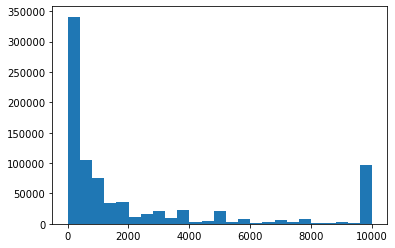

In [4]:
# HISTOGRAM OF PROPERTY VALUES
MAX_PROPERTY_VALUE_FOR_HISTOGRAM = 10000
property_values = property["property_value"].values
property_values = [min(MAX_PROPERTY_VALUE_FOR_HISTOGRAM, value) for value in property_values]

plt.hist(property_values, bins=25);

In [5]:
# LIST OF MEAN PROPERTY VALUES FOR EACH CATEGORY OF PROPERTY
property_grouped = property.groupby("prop_desc_name")
property_grouped_sort_by_mean = property_grouped["property_value"].mean().sort_values(ascending=False)
for key, value in property_grouped_sort_by_mean.items():
    print(key, int(value))

Aircraft 89726
Building Materials 19787
Watercraft 19523
Buses 19222
Collections/ Collectibles 17662
Negotiable Instruments 15324
Trucks 15286
Jewelry/ Precious Metals 14860
Recreational Vehicles 13856
Trailers 13482
Industrial Equipment 13384
Automobile 12519
Structure/ Single dwelling 12294
Farm Equipment 12193
Money 11960
Other Motor Vehicles 10121
Drugs/ Narcotics 8459
Metals, Non-Precious 8300
Aircraft Parts/ Accessories 6439
Structure/ Public 6434
Crops 6408
Livestock 5710
Structure/ Other 4448
Watercraft Equipment/ Parts/ Accessories 4443
Structure/ Other commercial 4335
Structure/ Other residence 4005
Structure/ Other industrial 3971
Medical/ Medical Lab Equipment 3512
Photographic/ Optical Equipment 3294
Pets 3246
Structure/ Storage 3180
Other 2995
Tools 2935
Musical Instruments 2824
Clothes/ Furs 2422
Computer Hard/ Software 2355
Recordings 2182
Chemicals 2120
Lawn/ Yard/ Garden Equipment 2046
Logging Equipment 1827
Vehicle Parts 1731
Law Enforcement Equipment 1563
Bicycles 1

In [6]:
# 25 MOST COSTLY INCIDENTS, WITH OFFENSE AND LOCATION DESCRIPTIONS
dataframe = property_file_reader.get_property_df()
dataframe = offense_file_reader.merge_offense_to_df(dataframe)
dataframe = location_file_reader.merge_location_to_df(dataframe)
dataframe = dataframe.sort_values(by="property_value", ascending=False)
dataframe.head(n=25)

,data_year_x,property_id,incident_id,prop_loss_id,stolen_count,recovered_count,data_year_y,prop_desc_id,property_value,date_recovered,...,method_entry_code,offense_name,crime_against,ct_flag,hc_flag,hc_code,offense_category_name,offense_group,location_code,location_name
958842,2023,181193892,187008341,7,NaN,NaN,2023,42,124465227.0,NaN,...,NaN,All Other Larceny,Property,t,t,,Larceny/Theft Offenses,A,6,Construction Site
492666,2023,171126366,175335063,7,NaN,NaN,2023,6,73455869.0,NaN,...,N,Burglary/Breaking & Entering,Property,t,t,05,Burglary/Breaking & Entering,A,5,Commercial/Office Building
904717,2023,172105935,176448290,7,NaN,NaN,2023,63,66000000.0,NaN,...,NaN,Embezzlement,Property,t,t,,Embezzlement,A,14,Hotel/Motel/Etc.
497071,2023,175894945,180899008,3,NaN,NaN,2023,20,54158500.0,NaN,...,NaN,Counterfeiting/Forgery,Property,f,t,,Counterfeiting/Forgery,A,5,Commercial/Office Building
924647,2023,172579147,177001032,7,NaN,NaN,2023,45,23647110.0,NaN,...,NaN,Destruction/Damage/Vandalism of Property,Property,f,t,11,Destruction/Damage/Vandalism of Property,A,19,Rental Storage Facility
924646,2023,172579147,177001032,7,NaN,NaN,2023,45,23647110.0,NaN,...,F,Burglary/Breaking & Entering,Property,t,t,05,Burglary/Breaking & Entering,A,19,Rental Storage Facility
433282,2023,176837587,181986121,2,NaN,NaN,2023,35,10010000.0,NaN,...,NaN,Arson,Property,f,t,08,Arson,A,25,Other/Unknown
806682,2023,181372080,187212229,3,NaN,NaN,2023,20,9999999.0,NaN,...,NaN,Counterfeiting/Forgery,Property,f,t,,Counterfeiting/Forgery,A,20,Residence/Home
801925,2023,171374409,175613126,7,NaN,NaN,2023,29,8800000.0,NaN,...,NaN,False Pretenses/Swindle/Confidence Game,Property,t,t,,Fraud Offenses,A,20,Residence/Home
488144,2023,179214879,184723856,7,NaN,NaN,2023,20,8500000.0,NaN,...,NaN,All Other Larceny,Property,t,t,,Larceny/Theft Offenses,A,5,Commercial/Office Building
